In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [2]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(23)

## Classification

In [3]:
iris_data = pd.read_csv("iris.csv")
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,virginica
125,7.2,3.2,6.0,1.8,virginica
67,5.8,2.7,4.1,1.0,versicolor
3,4.6,3.1,1.5,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica


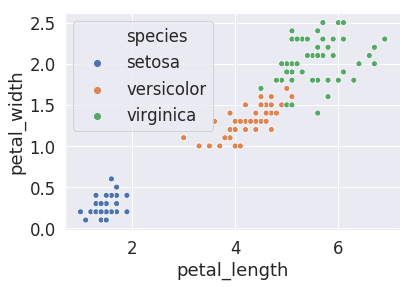

In [89]:
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_scatter_plot_with_petal_data.png", dpi=300, bbox_inches = "tight")

In [8]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [25]:
four_random_rows = iris_data.sample(4)
four_random_rows

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
64,5.6,2.9,3.6,1.3,versicolor
137,6.4,3.1,5.5,1.8,virginica
14,5.8,4.0,1.2,0.2,setosa


In [26]:
decision_tree_model.predict(four_random_rows[["petal_length", "petal_width"]])

array(['virginica', 'versicolor', 'virginica', 'setosa'], dtype=object)

In [27]:
decision_tree_model.predict_proba(four_random_rows[["petal_length", "petal_width"]])

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

[Text(173.4,210.32,'X[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.873,172.08,'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(204.927,172.08,'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(126.109,133.84,'X[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(63.0545,95.6,'X[1] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(31.5273,57.36,'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(94.5818,57.36,'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(189.164,95.6,'X[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(157.636,57.36,'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(220.691,57.36,'X[0] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(189.164,19.12,'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(252.218,19.12,'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(283.745,133.84,'X[0] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),


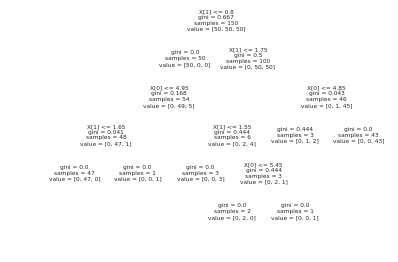

In [28]:
 tree.plot_tree(decision_tree_model) 

In [29]:
import graphviz 

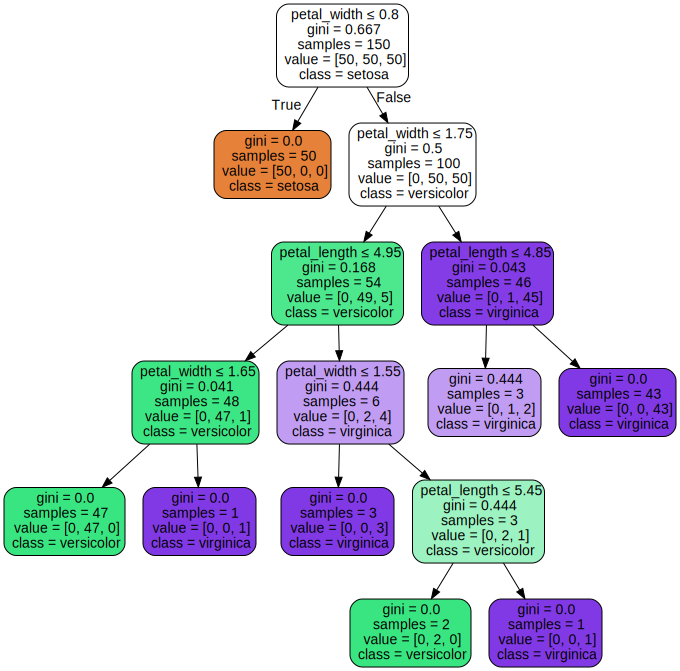

In [30]:
import graphviz
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                      feature_names=["petal_length", "petal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(format="png", filename="iris_tree")
graph

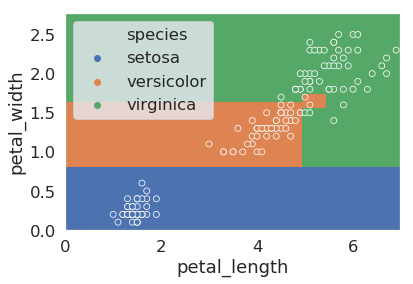

In [39]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries.png", dpi=300, bbox_inches = "tight")

In [42]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty = 'none')
logistic_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

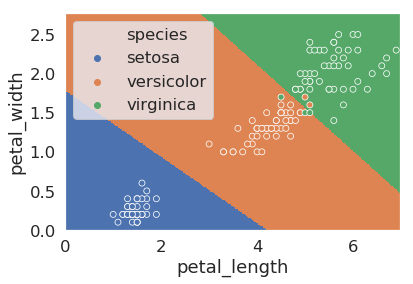

In [43]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.savefig("iris_decision_boundaries_logistic.png", dpi=300, bbox_inches = "tight")

In [46]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, iris_data["species"])

0.9933333333333333

In [47]:
iris_data.query("petal_length > 2.45 and petal_width > 1.75 and petal_length <= 4.85")

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
126,6.2,2.8,4.8,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica


## Overfitting

In [12]:
train_iris_data, test_iris_data = np.split(iris_data.sample(frac=1), [110])

In [ ]:
#sort so that the color labels match what we had in the earlier part of lecture
train_iris_data = train_iris_data.sort_values(by="species")
test_iris_data = test_iris_data.sort_values(by="species")

In [ ]:
len(train_iris_data)

In [ ]:
train_iris_data.head(5)

In [ ]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(train_iris_data[["petal_length", "petal_width"]], train_iris_data["species"])

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split_training_only.png", dpi=300, bbox_inches = "tight")

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split.png", dpi=300, bbox_inches = "tight")

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split_test_only.png", dpi=300, bbox_inches = "tight")

In [ ]:
accuracy_score(decision_tree_model.predict(train_iris_data[["petal_length", "petal_width"]]), train_iris_data["species"])

In [ ]:
predictions = decision_tree_model.predict(test_iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, test_iris_data["species"])

In [ ]:
from sklearn import tree
sepal_decision_tree_model = tree.DecisionTreeClassifier()
sepal_decision_tree_model = decision_tree_model.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

In [ ]:
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_scatter_plot_with_petal_data_sepal_only.png", dpi=300, bbox_inches = "tight")

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
fig = plt.gcf()
fig.savefig("iris_sepal_decision_boundaries_no_data.png", dpi=300, bbox_inches = "tight")

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_sepal_decision_boundaries_model_training_only.png", dpi=300, bbox_inches = "tight")

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_sepal_decision_boundaries_model_test_only.png", dpi=300, bbox_inches = "tight")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split.png", dpi=300, bbox_inches = "tight")

In [ ]:
dot_data = tree.export_graphviz(sepal_decision_tree_model, out_file=None, 
                      feature_names=["sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="sepal_tree")
#graph

In [ ]:
accuracy_score(sepal_decision_tree_model.predict(train_iris_data[["sepal_length", "sepal_width"]]), train_iris_data["species"])

In [ ]:
accuracy_score(sepal_decision_tree_model.predict(test_iris_data[["sepal_length", "sepal_width"]]), test_iris_data["species"])

In [ ]:
decision_tree_model_4d = tree.DecisionTreeClassifier()
decision_tree_model_4d = decision_tree_model_4d.fit(train_iris_data[["petal_length", "petal_width", 
                                                                     "sepal_length", "sepal_width"]], train_iris_data["species"])

In [ ]:
predictions = decision_tree_model_4d.predict(train_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, train_iris_data["species"])

In [ ]:
predictions = decision_tree_model_4d.predict(test_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, test_iris_data["species"])

In [ ]:
dot_data = tree.export_graphviz(decision_tree_model_4d, out_file=None, 
                      feature_names=["petal_length", "petal_width", "sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.render(format="png", filename="iris_4d_tree")

### Creating Decision Trees

In [ ]:
def entropy(x):
    normalized_x = x / np.sum(x)
    return sum(-normalized_x * np.log2(normalized_x))

In [ ]:
-np.log2(0.33)*0.33

In [ ]:
-np.log2(0.36)*0.36

In [ ]:
entropy([34, 36, 40])

In [ ]:
entropy([149, 1, 1])

In [ ]:
entropy([50, 50])

In [ ]:
entropy([50, 50, 50])

In [ ]:
entropy([31, 4, 1])

In [ ]:
#entropy([50, 46, 3])
#entropy([4, 47])
#entropy([41, 50])
#entropy([50, 50])

In [ ]:
def weighted_average_entropy(x1, x2):
    N1 = sum(x1)
    N2 = sum(x2)
    N = N1/(N1 + N2)
    return (N1 * entropy(x1) + N2 * entropy(x2)) / (N1 + N2)

In [ ]:
weighted_average_entropy([50, 46, 3], [4, 47])

In [ ]:
weighted_average_entropy([50, 9], [41, 50])

In [ ]:
weighted_average_entropy([2, 50, 50], [48])

In [ ]:
weighted_average_entropy([50, 50], [50])

In [48]:
def gini(x):
    normalized_x = x / np.sum(x)
    return sum(normalized_x * (1 - normalized_x))

In [49]:
gini([50, 46, 3])

0.5281093765942251

In [50]:
gini([4, 47])

0.14455978469819303

In [51]:
def weighted_average_gini(x1, x2):
    N1 = sum(x1)
    N2 = sum(x2)
    N = N1/(N1 + N2)
    return (N1 * gini(x1) + N2 * gini(x2)) / (N1 + N2)

In [52]:
weighted_average_gini([50, 46, 3], [4, 47])

0.3977025153495742

In [53]:
gini([50, 9])

0.25854639471416263

In [54]:
gini([41, 50])

0.49510928631807755

In [55]:
weighted_average_gini([50, 9], [41, 50])

0.40206121562053765

In [56]:
gini([2, 50, 50])

0.5190311418685121

In [57]:
gini([48])

0.0

In [58]:
weighted_average_gini([2, 50, 50], [48])

0.3529411764705882

In [59]:
gini([50, 50])

0.5

In [60]:
weighted_average_gini([50, 50], [50])

0.3333333333333333

In [61]:
weighted_average_gini([49, 5], [1, 45])

0.11030595813204506

In [62]:
weighted_average_gini([47, 1], [2, 4])

0.08564814814814818

In [63]:
weighted_average_gini([1, 2], [43])

0.028985507246376815

In [65]:
weighted_average_gini([3], [2, 1])

0.22222222222222224

#### Avoiding Overfitting

In [76]:
decision_tree = tree.DecisionTreeClassifier(min_impurity_decrease = 0.1)
decision_tree.fit(iris_data[["petal_length", "petal_width"]], 
                  iris_data["species"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.1, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

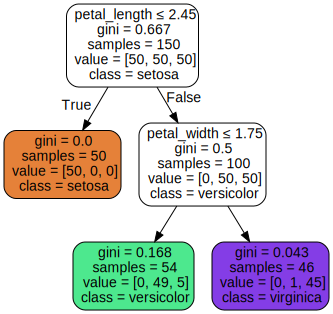

In [77]:
import graphviz
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                      feature_names=["petal_length", "petal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

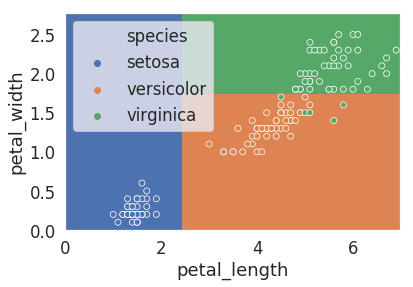

In [82]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
plt.savefig("deltawg10_model_decision_boundaries.png", dpi=300, bbox_inches = "tight")

#### Grid Search for Parameters

In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_impurity_decrease': [0, 0.01, 0.02, 0.05, 0.1]}
decision_tree = tree.DecisionTreeClassifier()
decision_tree_cv = GridSearchCV(decision_tree, parameters, cv = 10)
                                
decision_tree_cv.fit(train_iris_data[["sepal_length", "sepal_width"]], 
                     train_iris_data["species"])

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_impurity_decrease': [0, 0.01, 0.02, 0.05, 0.1]}

In [23]:
decision_tree_cv.best_params_

{'min_impurity_decrease': 0.02}

In [24]:
decision_tree_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.02, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

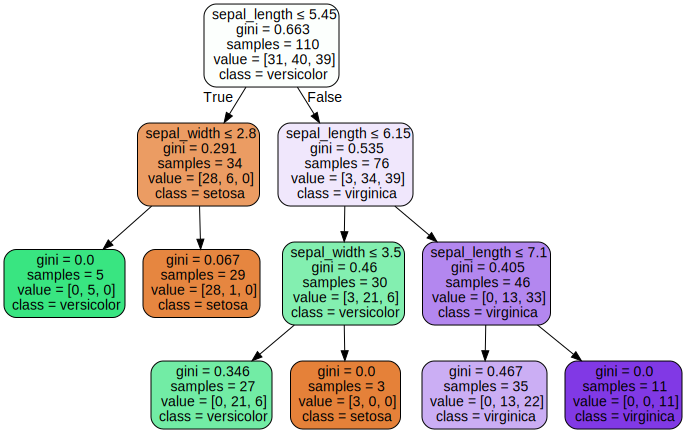

In [25]:
import graphviz
dot_data = tree.export_graphviz(decision_tree_cv.best_estimator_, out_file=None, 
                      feature_names=["sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(format="png", filename="iris_tree")
graph

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_split' : [2, 5, 10], 
              'max_depth':[4, 5, 6, None],
              'min_impurity_decrease': [0, 0.01, 0.02, 0.05, 0.1]}
decision_tree = tree.DecisionTreeClassifier()
decision_tree_cv = GridSearchCV(decision_tree, parameters, cv = 10
                                
decision_tree_cv.fit(train_iris_data[["sepal_length", "sepal_width"]], 
                     train_iris_data["species"])

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [0, 0.5, 1.0, 2.0, 3.0],
              

In [14]:
decision_tree_cv.best_params_

{'ccp_alpha': 0,
 'max_depth': 4,
 'min_impurity_decrease': 0.02,
 'min_samples_split': 2}

In [15]:
decision_tree_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.02, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

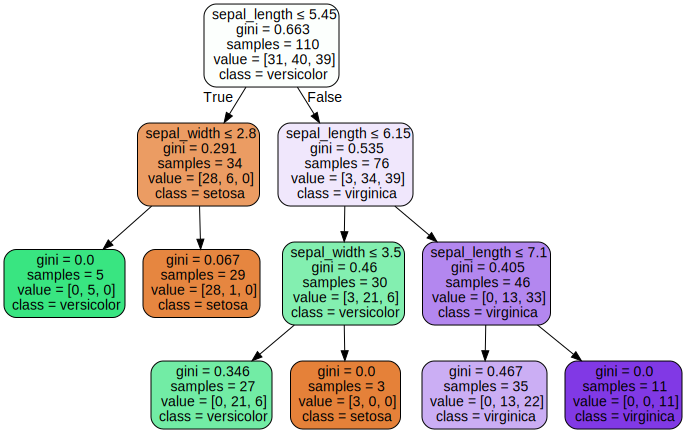

In [16]:
import graphviz
dot_data = tree.export_graphviz(decision_tree_cv.best_estimator_, out_file=None, 
                      feature_names=["sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(format="png", filename="iris_tree")
graph

In [17]:
cv_model_train_predictions = decision_tree_cv.predict(train_iris_data[["sepal_length", "sepal_width"]])

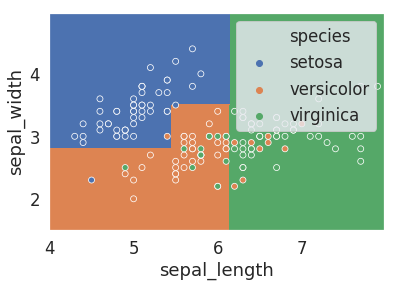

In [20]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.5, 5, 0.02))

Z_string = decision_tree_cv.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species")
#fig = plt.gcf()
plt.savefig("cvmodel_boundaries.png", dpi=300, bbox_inches = "tight")

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(train_iris_data["species"], cv_model_train_predictions)

In [ ]:
cv_model_test_predictions = decision_tree_cv.predict(test_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])

In [ ]:
accuracy_score(test_iris_data["species"], cv_model_test_predictions)